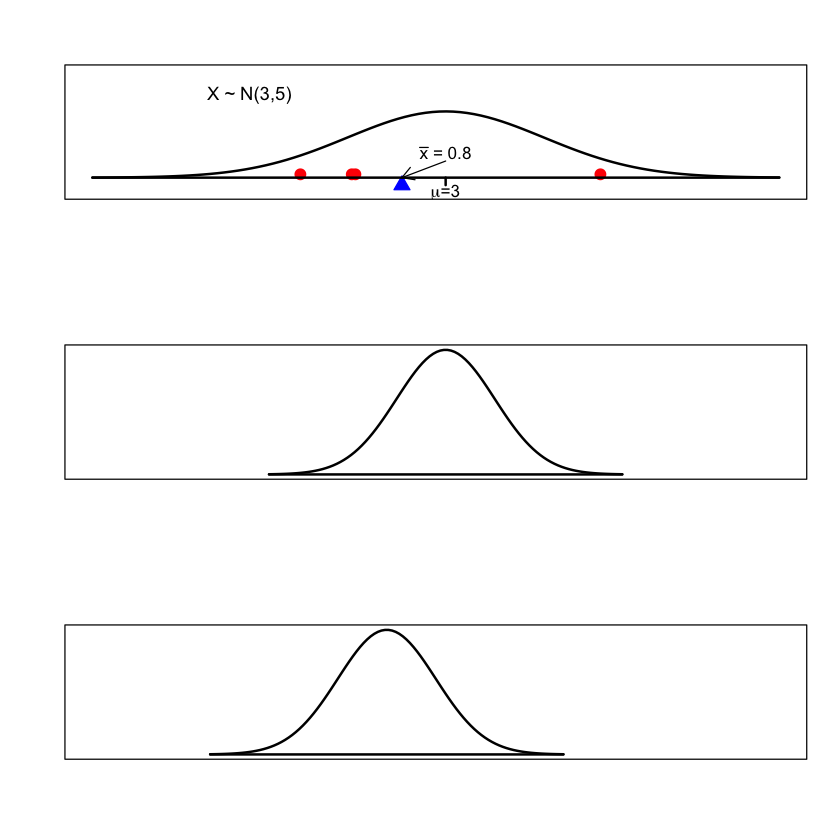

In [2]:
set.seed(12)
par(mfrow = c(3,1))
par(bg = "white", col.axis = "white", col.lab = "white", col.main = "white", 
    col.sub = "white", xaxt = "n", yaxt = "n")

n1 = 4; n2 = 9; n3 = 25; n4 = 36

sample = rnorm(4, 3, 5)
sample_mean = round(sample, 1)

x = seq(-15, 20, length.out = 100)
y1 = dnorm(x, 3, 5)
plot(x, y1, type = "l", lwd = 2, xlim = c(-15, 20),ylim=c(-0.02,max(y1)+0.05))
stripchart(sample, add=TRUE,at=0.004,cex=2, pch=16,col="red")
stripchart(mean(sample), add=TRUE,at=-0.009,cex=2, pch=24,col="blue",bg="blue")
lines(x = c(-15, 20), y = c(0, 0), col = "black", lwd = 2)
arrows(3,0.02,mean(sample),0,length = 0.11)
segments(3, 0, 3, -0.009, lwd = 2)
text(3, -0.017, expression(mu * "=3"),cex=1.3)
text(-7, max(y1)+0.02, "X ~ N(3,5)",cex=1.4)
text(3, 0.03, cex=1.3,substitute(paste(bar(x), " = ", mean),list(mean=round(mean(sample),1))))



x = seq(-6, 12, length.out = 100)
y2 = dnorm(x, 3, 5/sqrt(n1))
plot(x, y2, type = "l", lwd = 2, xlim = c(-15, 20))
lines(x = c(-6, 12), y = c(0, 0), col = "black", lwd = 2)

x = seq(-9, 9, length.out = 100)
y2 = dnorm(x, 0, 5/sqrt(n1))
plot(x, y2, type = "l", lwd = 2, xlim = c(-15, 20))
lines(x = c(-9, 9), y = c(0, 0), col = "black", lwd = 2)

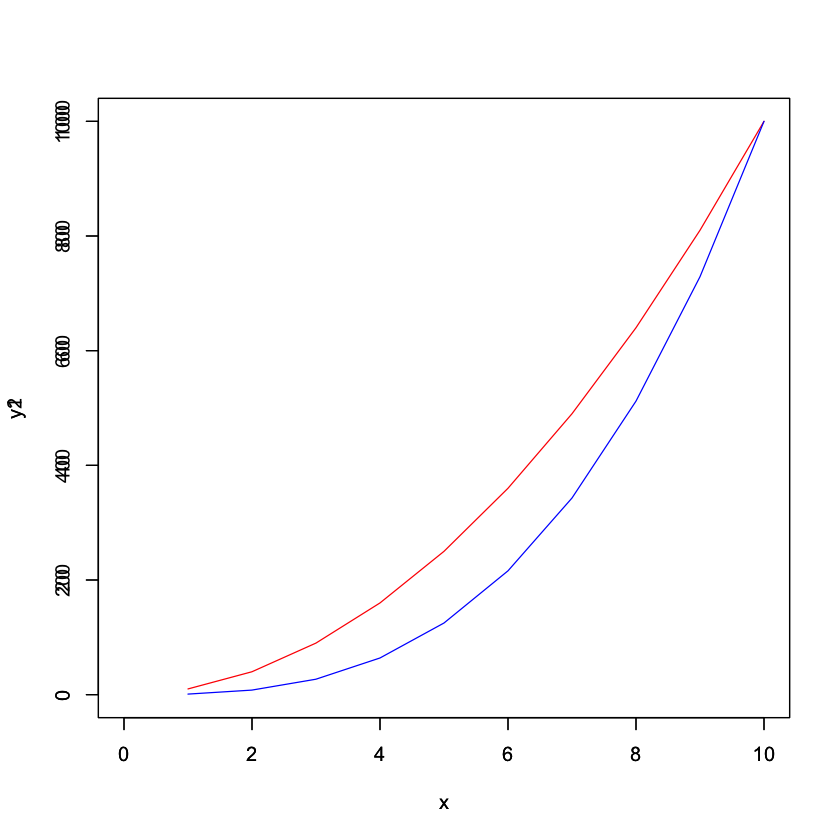

In [3]:
x <- 1:10
y1 <- x^2
y2 <- x^3

# 첫 번째 그래프를 그립니다.
plot(x, y1, type = "l", col = "red", xlim = c(0, 10), ylim = c(0, 100))

# 두 번째 그래프를 그립니다.
par(new = TRUE)
plot(x, y2, type = "l", col = "blue", xlim = c(0, 10), ylim = c(0, 1000))


In [ ]:
library(beeswarm); set.seed(1235) 

random_a = c(rnorm(25,172,6)); random_b = c(rnorm(25,167,6))
random_a_and_b = c(random_a, random_b) # 두 그룹 난수

group_a = rep("a",25);group_b = rep("b",25)

group_a_and_b = c(group_a,group_b) # "a","b" 라벨링

############################################################################

rslt = aov(random_a_and_b ~ group_a_and_b) # one-way ANOVA
summary(rslt) # 유의  -> 사후분석 수행 

# 사후 분석
# HSD 검정 : 집단 내 변동성 사용 -> 평균차이 유의 여부 결정
# 임계값 : qt_val은 HSD분포에서 얻어지는 값, 이 값을 기준으로 그룹 간 평균 차이 유의여부 판단
# qt_val보다 큰 차이가 나타난다면 95% 신뢰수준에서 유의하다고 결론
qt_val = qtukey(df = rslt_list[2], nmeans = 2,p = 0.95 )/sqrt(2) # 유의수준 보정
rslt_list = unlist(summary(rslt)) # 분석 결과를 벡터로 저장
sd = sqrt(rslt_list[6]) # 집단 내 변동성
n = 25 # 샘플 크기
margin_error = qt_val*sd*sqrt(1/n) # 표준오차

sample_mean = aggregate(random_a_and_b, list(group_a_and_b), mean) # 각 그룹 평균

moes = c(sample_mean$x-margin_error, sample_mean$x+margin_error) # 신뢰구간
############################################################################

par(mar = c(5,5,2,5)) # 여백 조정
plot(c(150,190),axes=FALSE, xaxt="n", type="n",
     xlim=c(0.3, 2.5), ylab="height" ) # 캔버스 생성
beeswarm(random_a_and_b~group_a_and_b,side=-1,
         col = 1:length(n), add=TRUE,ylim=yrange,  
         method="center",xlab="",main = '') # 표본 plotting
axis(1, 1:2, labels=c("A","B")) # 2개의 집단 표시
axis(2) # 세로축 생성


x_adj = c(1,2) + 0.245 # beeswarm옆에 그리기 위해 값 조정
arrows(x_adj[1],moes[1],x_adj[1],moes[3],lwd=1.4, length=0.14,angle=90, code=3) # 집단 a의 신뢰구간
arrows(x_adj[2],moes[2],x_adj[2],moes[4],lwd=1.4, length=0.14,angle=90, code=3) # 집단 b의 신뢰구간
points(x_adj, sample_mean$x,col=2,pch=20) # 집단 a ,b 평균
lines(c(x_adj[2], 3), c(sample_mean$x[2], sample_mean$x[2]), lty=3)

par(new=TRUE) # 위에 겹쳐 그리기
diff=sample_mean$x[1]-sample_mean$x[2] # 평균 차이

test=t.test(random_a_and_b~group_a_and_b, conf.level=0.95, var.equal=TRUE) # 평균차이 유의미한가?

ypos=c(diff, test$conf.int[1], test$conf.int[2])
xpos=rep(0.95, 3)

pvalue=round(test$p.value,3)

yrange = c(150,190)
plot(xpos[1], diff, axes=FALSE, xlab=NA, ylab=NA,
     type="n", xlim=c(0,1),
     ylim=yrange-sample_mean$x[2],
     main=paste("95% confidence interval\np-value=", pvalue))

arrows(xpos, test$conf.int[1], xpos,test$conf.int[2],
       ,length=0.15,angle=30, code=3)  # 평균 차이의 신뢰구간
points(xpos[1], diff, pch=18, col="blue")
axis(side=4, at=seq(-10,10,5))





In [ ]:
library(beeswarm); set.seed(1235) 

random_a = c(rnorm(25,172,6)); random_b = c(rnorm(25,167,6))
random_a_and_b = c(random_a, random_b) # 두 그룹 난수

group_a = rep("a",25);group_b = rep("b",25)

group_a_and_b = c(group_a,group_b) # "a","b" 라벨링

############################################################################

rslt = aov(random_a_and_b ~ group_a_and_b) # one-way ANOVA
summary(rslt) # 유의  -> 사후분석 수행 

# 사후 분석
# HSD 검정 : 집단 내 변동성 사용 -> 평균차이 유의 여부 결정
# 임계값 : qt_val은 HSD분포에서 얻어지는 값, 이 값을 기준으로 그룹 간 평균 차이 유의여부 판단
# qt_val보다 큰 차이가 나타난다면 95% 신뢰수준에서 유의하다고 결론
qt_val = qtukey(df = rslt_list[2], nmeans = 2,p = 0.95 )/sqrt(2) # 유의수준 보정
rslt_list = unlist(summary(rslt)) # 분석 결과를 벡터로 저장
sd = sqrt(rslt_list[6]) # 집단 내 변동성
n = 25 # 샘플 크기
margin_error = qt_val*sd*sqrt(1/n) # 표준오차

sample_mean = aggregate(random_a_and_b, list(group_a_and_b), mean) # 각 그룹 평균

moes = c(sample_mean$x-margin_error, sample_mean$x+margin_error) # 신뢰구간
############################################################################

par(mar = c(5,5,2,5)) # 여백 조정
plot(c(150,190),axes=FALSE, xaxt="n", type="n",
     xlim=c(0.3, 2.5), ylab="height" ) # 캔버스 생성
y_range=c(150,190)
beeswarm(random_a_and_b~group_a_and_b,side=-1,
         col = 1:length(n), add=TRUE,ylim=y_range,  
         method="center",xlab="",main = '') # 표본 plotting
axis(1, 1:2, labels=c("A","B")) # 2개의 집단 표시
axis(2) # 세로축 생성


x_adj = c(1,2) + 0.245 # beeswarm옆에 그리기 위해 값 조정
arrows(x_adj[1],moes[1],x_adj[1],moes[3],lwd=1.4, length=0.14,angle=90, code=3) # 집단 a의 신뢰구간
arrows(x_adj[2],moes[2],x_adj[2],moes[4],lwd=1.4, length=0.14,angle=90, code=3) # 집단 b의 신뢰구간
points(x_adj, sample_mean$x,col=2,pch=20) # 집단 a ,b 평균
lines(c(x_adj[2], 3), c(sample_mean$x[2], sample_mean$x[2]), lty=3)

par(new=TRUE) # 위에 겹쳐 그리기
diff=sample_mean$x[1]-sample_mean$x[2] # 평균 차이

test=t.test(random_a_and_b~group_a_and_b, 
            conf.level=0.95, var.equal=TRUE) # 평균차이 유의미한가?

xpos=rep(0.97, 3)

pvalue=round(test$p.value,3)

y_range = c(150,190)
plot(xpos[1], diff, axes=FALSE, xlab=NA, ylab=NA,
     type="n", xlim=c(0,1),
     ylim=y_range-sample_mean$x[2],
     main=paste("95% confidence interval\np-value=", pvalue))

arrows(xpos, test$conf.int[1], xpos,test$conf.int[2],
       ,length=0.15,angle=30, code=3)  # 평균 차이의 신뢰구간
points(xpos[1], diff, pch=18, col="blue")
axis(side=4, at=seq(-10,10,5))





In [ ]:
library(beeswarm)

ns=c(25,25)
#ns=c(30,30)

conf.coeff=0.95  # 신뢰계수

x=numeric()
type=numeric()

set.seed(1235)
for(i in 1:length(ns)){
  x=c(x, rnorm(ns[i], 172+(1-i)*5, 6))
  type = c(type, rep(LETTERS[i], ns[i]))
}

aov_res = aov(x~type) 
res = unlist(summary(aov_res))

mc_res = TukeyHSD(aov_res)

df = res[2]  # df = sum(n_i-1)
pooledSD = sqrt(res[6]) # pooledSE = sqrt(sum((n_i-1)*var(x_i))/df)
qtval = qtukey(p = conf.coeff, nmeans = res[1]+1, df = df)/sqrt(2)

sample_mean=aggregate(x, list(type), mean)
n=aggregate(x, list(type), length)$x
#moe = qtval*pooledSD*sqrt(1/n)/sqrt(2)
moe = qtval*pooledSD*sqrt(1/n)

xp=1:length(n)
xp=xp+0.2

moes=c(sample_mean$x-moe, sample_mean$x+moe)
min=min(x)
max=max(x)
addmargin=(max-min)/20

par(mar = c(5,10,2,10))
yrange=c(150,190)

par(bty="l")
plot(yrange, type="n", axes=FALSE, xaxt="n", xlim=c(0.5, length(xp)+0.5), main="", xlab="population", ylab="height" )
axis(1, 1:length(xp), labels=sample_mean$Group.1)
axis(2)

arrows(xp, sample_mean$x-moe, xp, sample_mean$x+moe, angle=90, code=3, length=0.1)  # 각 평균에 대한 신뢰구간
points(xp, sample_mean$x, pch=18, col=2)
lines(c(xp[2], 3), c(sample_mean$x[2], sample_mean$x[2]), lty=3)

beeswarm(x~type, method="center", col = 1:length(n), ylim=yrange, side=-1, xlab="",
         main = '', add=TRUE)

par(new=TRUE)

diff=sample_mean$x[1]-sample_mean$x[2]

two=t.test(x~type, conf.level=conf.coeff, var.equal=TRUE)

ypos=c(diff, two$conf.int[1], two$conf.int[2])
xpos=rep(0.95, 3)

pv=round(two$p.value,3)
plot(xpos[1], diff, axes=FALSE, type="n", xlim=c(0,1), ylim=yrange-sample_mean$x[2], xlab=NA, ylab=NA, main=paste("95% 신뢰구간,  p-value=", pv))
arrows(xpos, two$conf.int[1], xpos, two$conf.int[2], angle=30, code=3, length=0.1)  # 차이에 대한 신뢰구간
points(xpos[1], diff, pch=18, col="blue")
axis(side=4, at=seq(-10,10,5))
   
 이전 63  172 다음 

In [1]:
library(beeswarm); set.seed(1235) 

random_a = c(rnorm(25,172,6)); random_b = c(rnorm(25,167,6))
random_a_and_b = c(random_a, random_b) # 두 그룹의 난수 결과 결합

group_a = rep("a",25);group_b = rep("b",25)
group_a_and_b = c(group_a,group_b) # "a","b" 라벨링 결합

############################################################################

rslt = aov(random_a_and_b ~ group_a_and_b) # 두 그룹의 평균 차이에 대한 분산분석
rslt_list = unlist(summary(rslt)) # 분석 결과를 벡터로 변환 후 저장

sd = sqrt(rslt_list[6]) # 두 그룹의 평균 차이의 표준편차, 집단 내 변동성

# HSD 검정 : 집단 내 변동성 사용하여 평균차이의 유의 여부 결정
# 임계값인 qt_val은 HSD분포에서 얻어지는 값으로서 이 값을 기준으로 그룹 간 평균 차이 유의여부 판단
# qt_val보다 큰 차이가 나타난다면 95% 신뢰수준에서 유의하다고 결론 지을 수 있음
# 표준오차를 조정하기 위해 사용
qt_val = qtukey(p = 0.95, df = rslt_list[2], nmeans = 2 )/sqrt(2)

sample_mean = aggregate(random_a_and_b, list(group_a_and_b), mean) # 각 그룹 평균
n = 25 # 샘플 크기
margin_error = qtval*sd*sqrt(1/n) # 표준오차
moes = c(sample_mean$x-margin_error, sample_mean$x+margin_error) # 신뢰구간

############################################################################

par(mar = c(5,5,2,5)) # 여백 조정
plot(c(150,190),axes=FALSE, xaxt="n", type="n",
     xlim=c(0.3, 2.5), ylab="height" )
beeswarm(random_a_and_b~group_a_and_b,side=-1,
         col = 1:length(n), ylim=yrange,  
         method="center",xlab="",
         main = '', add=TRUE) # 표본 
axis(1, 1:length(xp), labels=c("A","B"))
axis(2)

xp = 1:2 + 0.2
arrows(xp, sample_mean$x-moe, xp, sample_mean$x+moe, , length=0.2,angle=90, code=3)  # 각 평균에 대한 신뢰구간
points(xp, sample_mean$x,col=2,pch=20)
lines(c(xp[2], 3), c(sample_mean$x[2], sample_mean$x[2]), lty=3)

par(new=TRUE) # 위에 겹쳐 그리기
diff=sample_mean$x[1]-sample_mean$x[2]

test=t.test(x~type, conf.level=conf.coeff, var.equal=TRUE) # 평균차이 유의미한가?

ypos=c(diff, test$conf.int[1], test$conf.int[2])
xpos=rep(0.95, 3)

pvalue=round(test$p.value,3)

plot(xpos[1], diff, axes=FALSE, xlab=NA, ylab=NA,
     type="n", xlim=c(0,1),
     ylim=yrange-sample_mean$x[2],
     main=paste("95% confidence interval\np-value=", pvalue))

arrows(xpos, test$conf.int[1], xpos,length=0.2,
       test$conf.int[2], angle=30, code=3)  # 평균 차이의 신뢰구간
points(xpos[1], diff, pch=18, col="blue")
axis(side=4, at=seq(-10,10,5))

ERROR: Error in library(beeswarm): ‘beeswarm’이라고 불리는 패키지가 없습니다
